In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [5]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("Dataset Shape:", train_df.shape)
print("\nMissing Values:\n")
print(train_df.isnull().sum())

Dataset Shape: (891, 12)

Missing Values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
train_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


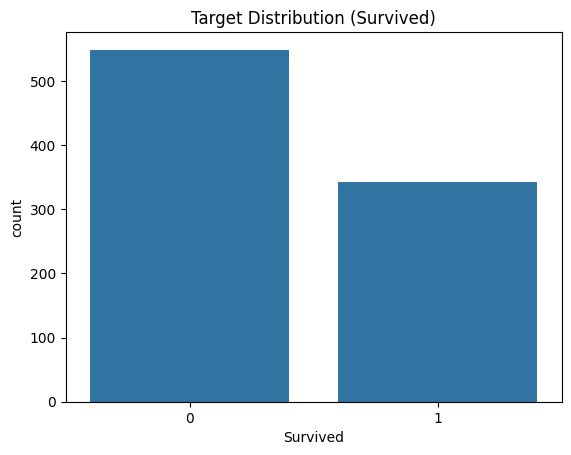

In [8]:
sns.countplot(x='Survived', data=train_df)
plt.title("Target Distribution (Survived)")
plt.show()

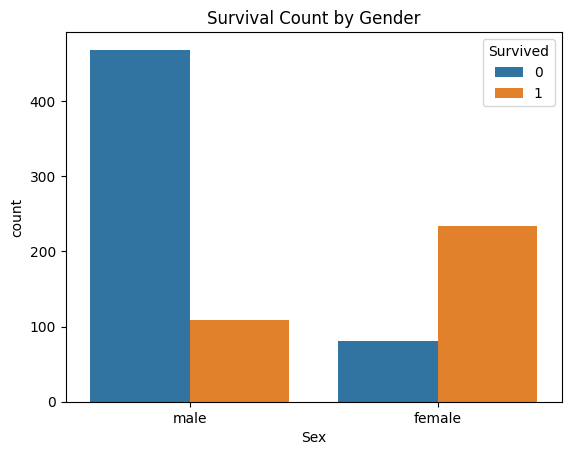

In [9]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title("Survival Count by Gender")
plt.show()

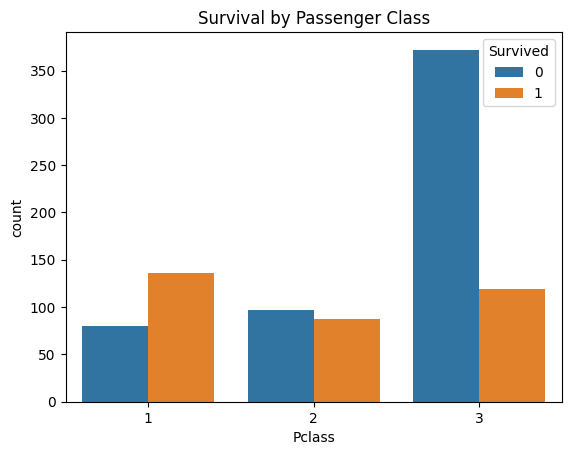

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title("Survival by Passenger Class")
plt.show()

In [11]:
features = ['Pclass', 'Sex', 'Age', 'Fare']
target = 'Survived'

df = train_df[features + [target]].copy()

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

/tmp/ipython-input-1975256798.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1975256798.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [12]:
X = df.drop(columns=target)
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred = model.predict(X_val_scaled)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_val, y_pred))

Accuracy: 0.7877094972067039
F1 Score: 0.7121212121212122

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.68      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [16]:
val_results = X_val.copy()
val_results['true'] = y_val.values
val_results['pred'] = y_pred

# Male (Sex = 0)
male_data = val_results[val_results['Sex'] == 0]
female_data = val_results[val_results['Sex'] == 1]

male_f1 = f1_score(male_data['true'], male_data['pred'])
female_f1 = f1_score(female_data['true'], female_data['pred'])

print("F1 Score (Male):", male_f1)
print("F1 Score (Female):", female_f1)

F1 Score (Male): 0.21428571428571427
F1 Score (Female): 0.8461538461538461
